#Malarial Detection Project CNN

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras.layers import InputLayer,Conv2D,MaxPool2D,Flatten,Dense,BatchNormalization,Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy


In [ ]:
dataset,dataset_info=tfds.load('malaria',with_info=True,shuffle_files=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceed

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/27558 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/malaria/incomplete.KYXZTB_1.0.0/malaria-train.tfrecord*...:   0%|         …

Dataset malaria downloaded and prepared to /root/tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.


In [ ]:
print(type(dataset))

<class 'dict'>


In [ ]:
def split_data(dataset,train_ratio,val_ratio,test_ratio):
  train_ds=dataset.take(int(len(dataset)*train_ratio))
  val_ds=dataset.skip(int(len(dataset)*train_ratio)).take(int(len(dataset)*val_ratio))
  test_ds=dataset.skip(int(len(dataset)*train_ratio)+int(len(dataset)*val_ratio))
  return train_ds,val_ds,test_ds

In [ ]:
train_ratio=0.7
val_ratio=0.1
test_ratio=0.2
train,val,test=split_data(dataset['train'],train_ratio,val_ratio,test_ratio)

In [ ]:
from pprint import pprint
pprint(dataset_info)



tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_dir=PosixGPath('/tmp/tmp_41cbizutfds'),
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite detection in thin blood smear images},


In [ ]:
dataset_info

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_dir=PosixGPath('/tmp/tmp_41cbizutfds'),
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite detection in thin blood smear images},


In [ ]:
print(train)


<_TakeDataset element_spec={'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>


In [ ]:
def get_label_str(label):
  if label==0:
    return 'Parasitized'
  elif label==1:
    return 'Uninfected'


<ipython-input-11-58780fac4527>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax=plt.subplot(4,4,i+1)


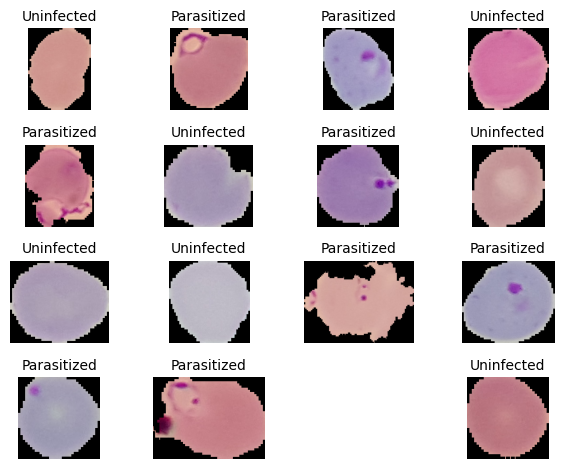

In [ ]:
for i,sample in enumerate(train.take(16)):
  ax=plt.subplot(4,4,i+1)
  plt.imshow(sample['image'])
  plt.title(get_label_str(sample['label'].numpy()),fontsize=10)
  plt.axis('off')
  plt.tight_layout()



In [ ]:
import tensorflow as tf

batch_size=32

def resize_rescale(input_image, label, img_size=224):
    # Resize the image
    image = tf.image.resize(input_image, (img_size, img_size))
    # Rescale the image
    image = image / 255.0
    return image, label

# Apply the function using map
train_ds = train.map(lambda x: resize_rescale(x['image'], x['label'])).shuffle(buffer_size=8,reshuffle_each_iteration=True).batch(batch_size).prefetch(tf.data.AUTOTUNE)
val_ds = val.map(lambda x: resize_rescale(x['image'], x['label'])).shuffle(buffer_size=8,reshuffle_each_iteration=True).batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_ds = test.map(lambda x: resize_rescale(x['image'], x['label'])).shuffle(buffer_size=8,reshuffle_each_iteration=True).batch(batch_size).prefetch(tf.data.AUTOTUNE)


In [ ]:
for img,label in train_ds.take(1):
  print(img.shape,get_label_str(sample['label']))

(32, 224, 224, 3) Uninfected


In [ ]:
img_size=224
lenet_malaria_model=tf.keras.Sequential([InputLayer(input_shape=(img_size,img_size,3)),
                           Conv2D(filters=6,kernel_size=3,strides=1,padding='valid',activation='relu'),
                           BatchNormalization(),
                           MaxPool2D(pool_size=2,strides=2),
                           Conv2D(filters=16,kernel_size=3,strides=1,padding='valid',activation='relu'),
                           BatchNormalization(),
                           MaxPool2D(pool_size=2,strides=2),
                           Flatten(),
                           Dense(units=50,activation='relu'),
                           BatchNormalization(),
                           Dense(units=10,activation='relu'),
                           BatchNormalization(),
                           Dense(units=1,activation='sigmoid')

])
lenet_malaria_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 6)       168       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 6)       24        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 6)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 16)      64        
 chNormalization)                                                
                                                        

In [ ]:
lenet_malaria_model.compile(
    optimizer=Adam(learning_rate=0.01),
    loss=BinaryCrossentropy(),
    metrics=BinaryAccuracy()
)

In [ ]:
history=lenet_malaria_model.fit(train_ds,validation_data=val_ds,epochs=20,verbose=1)

Epoch 1/20
603/603 [==============================] - 114s 186ms/step - loss: 0.3129 - binary_accuracy: 0.8726 - val_loss: 1.2131 - val_binary_accuracy: 0.7695
Epoch 2/20
603/603 [==============================] - 109s 181ms/step - loss: 0.1993 - binary_accuracy: 0.9330 - val_loss: 0.4625 - val_binary_accuracy: 0.7909
Epoch 3/20
603/603 [==============================] - 109s 181ms/step - loss: 0.1813 - binary_accuracy: 0.9402 - val_loss: 0.3234 - val_binary_accuracy: 0.9100
Epoch 4/20
603/603 [==============================] - 108s 179ms/step - loss: 0.1667 - binary_accuracy: 0.9467 - val_loss: 0.2808 - val_binary_accuracy: 0.9100
Epoch 5/20
603/603 [==============================] - 107s 177ms/step - loss: 0.1669 - binary_accuracy: 0.9446 - val_loss: 0.5183 - val_binary_accuracy: 0.9216
Epoch 6/20
603/603 [==============================] - 109s 180ms/step - loss: 0.1623 - binary_accuracy: 0.9464 - val_loss: 0.6225 - val_binary_accuracy: 0.9053
Epoch 7/20
603/603 [====================

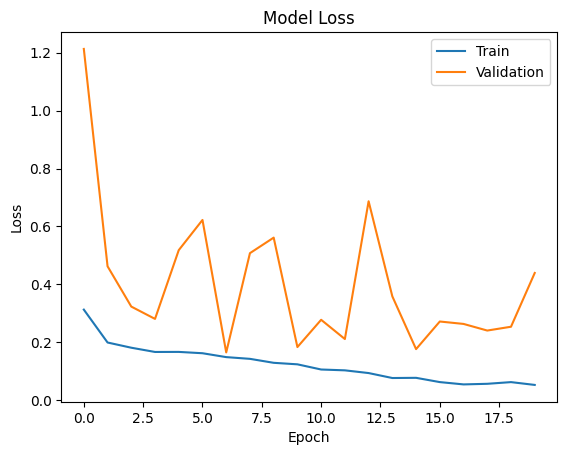

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
lenet_malaria_model.evaluate(test_ds)

173/173 [==============================] - 5s 27ms/step - loss: 0.3729 - binary_accuracy: 0.9441


[0.37290969491004944, 0.9441320300102234]

In [ ]:
def parasite_detect(x):
  if x<0.5:
    return str('P')
  else:
    return str('NP')

In [ ]:

#print(parasite_detect(lenet_malaria_model.predict(test_ds.take(1))[0][-1]))
for img, _ in test_ds.take(1):
    prediction = lenet_malaria_model.predict(img)
    print(parasite_detect(prediction[0][0]))


1/1 [==============================] - 0s 186ms/step
NP


1/1 [==============================] - 0s 58ms/step


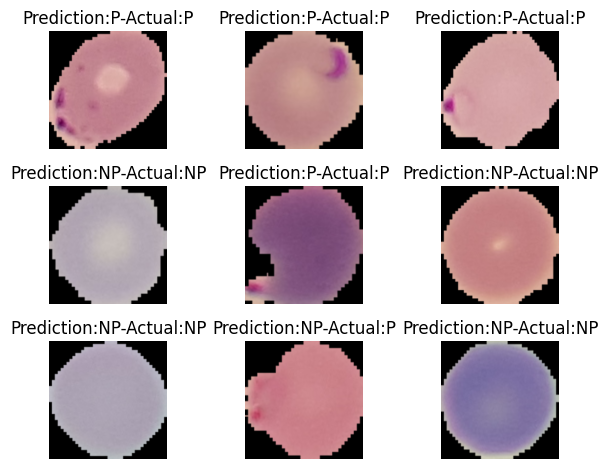

In [ ]:
for image,label in test_ds.take(1):
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(image[i])
    plt.title("Prediction:" + parasite_detect(lenet_malaria_model.predict(image)[i])+"-"+ "Actual:" + parasite_detect(label.numpy()[i]))
    plt.axis('off')
plt.tight_layout()

In [ ]:
test_dataset=test_ds.batch(1)
test_dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, None), dtype=tf.int64, name=None))>

In [ ]:
# Initialize an empty list to store predictions
predictions = []

# Create test_dataset with batch size 1
test_dataset = test_ds.unbatch().batch(1)

# Iterate through the test_dataset with batch size 1
for images, labels in test_dataset:
    # Predict on each image
    prediction = lenet_malaria_model.predict(images)
    # Append the prediction result to the list
    predictions.append(prediction[0][0])  # Get the prediction for the single image in the batch

# Now, use your parasite_detect function on the predictions
for pred in predictions:
    print(parasite_detect(pred))


Streaming output truncated to the last 5000 lines.
P
NP
NP
NP
NP
P
P
P
P
P
NP
P
NP
NP
P
P
P
NP
NP
P
P
P
P
P
P
NP
P
P
NP
NP
NP
NP
P
NP
NP
NP
NP
P
NP
P
P
P
P
P
P
NP
NP
NP
NP
P
P
P
NP
P
P
NP
NP
NP
P
P
NP
P
NP
P
P
NP
NP
P
NP
P
NP
P
NP
P
NP
NP
P
P
NP
NP
P
NP
NP
P
NP
NP
P
P
NP
P
P
NP
NP
P
P
P
P
NP
P
P
NP
NP
P
NP
NP
NP
NP
P
P
NP
NP
NP
P
P
NP
P
NP
NP
P
NP
NP
NP
P
NP
P
P
P
P
P
P
P
P
NP
NP
NP
P
NP
P
P
NP
P
NP
NP
NP
NP
P
NP
NP
P
P
NP
P
P
NP
P
P
NP
P
P
NP
NP
P
NP
P
P
NP
P
NP
P
P
NP
P
P
P
P
P
P
P
P
NP
NP
P
P
NP
P
NP
NP
P
P
NP
P
P
P
NP
NP
NP
NP
P
NP
NP
NP
NP
P
P
P
NP
P
NP
P
P
P
NP
P
NP
NP
P
P
P
NP
P
NP
P
P
NP
NP
P
NP
NP
P
NP
NP
NP
NP
P
NP
NP
P
NP
P
NP
P
P
P
P
NP
NP
P
NP
P
P
NP
NP
NP
NP
P
NP
NP
NP
P
P
P
P
P
NP
NP
P
P
NP
NP
NP
NP
P
P
P
P
P
NP
P
P
P
P
P
NP
P
NP
P
NP
P
P
NP
P
NP
NP
NP
P
NP
NP
NP
P
P
P
P
P
NP
NP
NP
NP
NP
P
NP
NP
NP
NP
NP
P
NP
NP
NP
P
NP
NP
NP
NP
P
P
P
P
NP
NP
P
P
P
NP
P
NP
P
NP
P
P
P
NP
P
P
NP
P
P
P
NP
P
NP
NP
NP
P
P
NP
NP
NP
NP
P
NP
P
NP
P
NP
P
NP
NP
NP
NP
NP
P
NP
NP
NP
NP
P
NP
NP
NP
NP

In [ ]:

# Evaluate the model on the test dataset
test_loss, test_accuracy = lenet_malaria_model.evaluate(test_dataset)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


5513/5513 [==============================] - 33s 6ms/step - loss: 0.3675 - binary_accuracy: 0.9447
Test Loss: 0.36749181151390076
Test Accuracy: 0.9446762204170227


1/1 [==============================] - 0s 27ms/step


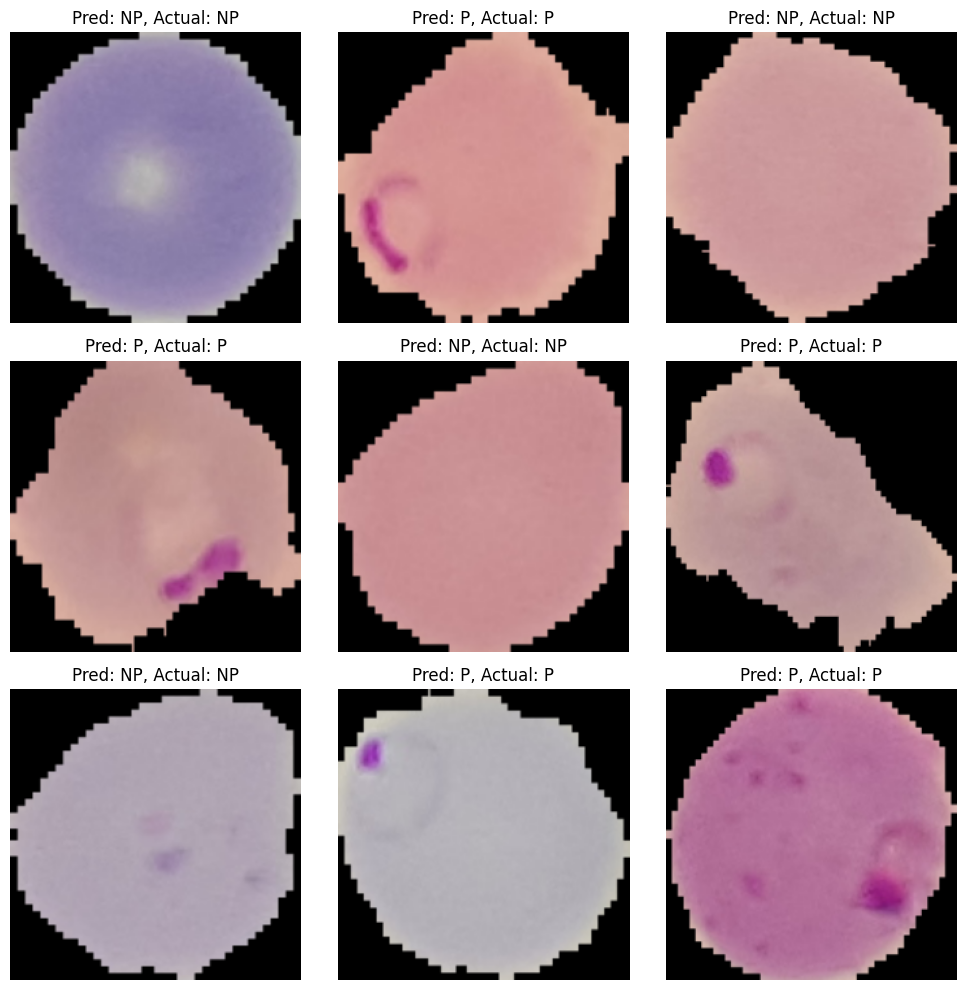

In [ ]:
import matplotlib.pyplot as plt

def visualize_predictions(test_dataset, model, num_images=9):
    plt.figure(figsize=(10, 10))
    for i, (images, labels) in enumerate(test_dataset.take(num_images)):
        ax = plt.subplot(3, 3, i + 1)
        predictions = model.predict(images)
        plt.imshow((images[0].numpy() * 255).astype("uint8"))  # Adjust normalization as needed
        plt.title(f"Pred: {parasite_detect(predictions[0][0])}, Actual: {parasite_detect(labels.numpy()[0])}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

# Assuming parasite_detect function is defined elsewhere
visualize_predictions(test_dataset, lenet_malaria_model)